# Assignment 2 - Machine Learning
**Project:** Project 1 - Classify Images of Road Traffic Signs

**Group Name:** Dan & Ethan
| Name               | Student Number |
|--------------------|----------------|
| Daniel Schellekens | s3900792       |
| Ethan Rayner       | s3902240       |

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

IMAGES_FILE = "images.csv"
TEST_TRAIN_SPLIT = 0.2
IMAGE_SIZE = 28

from models.utils import prep_data

data, train_data, val_data = prep_data(IMAGES_FILE, TEST_TRAIN_SPLIT)

Training set: 2959 rows
Validation set: 740 rows


In [2]:
import matplotlib.pyplot as plt
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

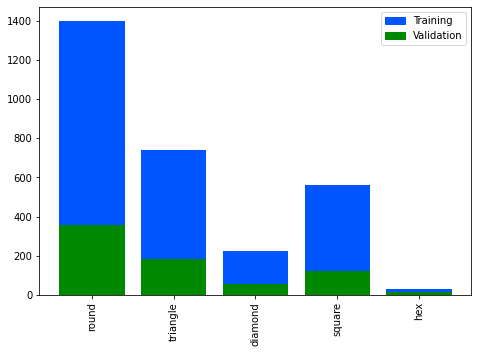

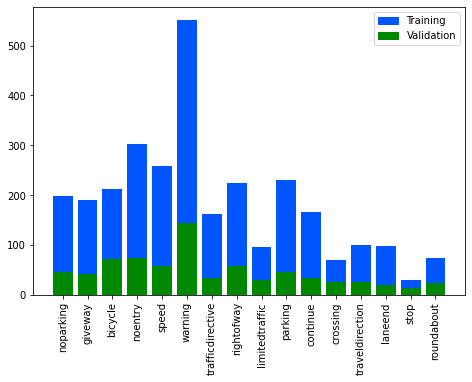

In [3]:
OUTPUT_CLASSES = 16
from models.eda import classes_histogram

classes_histogram(train_data, val_data, "shape")
classes_histogram(train_data, val_data, "type")

Found 2959 validated image filenames belonging to 16 classes.
Found 740 validated image filenames belonging to 16 classes.


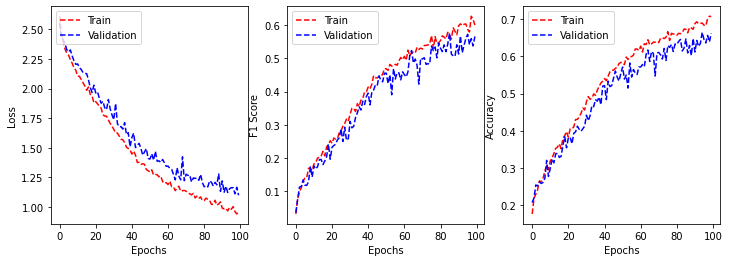

Overall F1 Macro Score: 0.5497

F1 Scores per class: bicycle = 0.6522, continue = 0.7397, crossing = 0.0769, giveway = 0.7532, laneend = 0.7805, limitedtraffic = 0.5217, noentry = 0.8553, noparking = 0.6392, parking = 0.7475, rightofway = 0.5565, roundabout = 0.2857, speed = 0.6612, stop = 0.0000, trafficdirective = 0.3860, traveldirection = 0.4211, warning = 0.7179

In [4]:
CLASS_COLUMN = "type"
BATCH_SIZE = 32
EPOCHS = 100

import models.MLP as mlp
from models.utils import history_graph
from models.utils import create_generator
from models.test import score_f1

mlp_train_images = create_generator(train_data, CLASS_COLUMN, IMAGE_SIZE, BATCH_SIZE)
mlp_val_images = create_generator(val_data, CLASS_COLUMN, IMAGE_SIZE, BATCH_SIZE)
mlp_model, mlp_history = mlp.fit_model(data, CLASS_COLUMN, mlp_train_images, mlp_val_images, IMAGE_SIZE, EPOCHS)
history_graph(mlp_history)
score_f1(mlp_model, mlp_val_images)

Found 80 validated image filenames belonging to 16 classes.
Overall F1 Macro Score: 0.3855

F1 Scores per class: bicycle = 0.3636, continue = 0.8000, crossing = 0.0000, giveway = 0.8889, laneend = 0.2500, limitedtraffic = 0.0000, noentry = 0.6667, noparking = 0.6250, parking = 0.5000, rightofway = 0.3333, roundabout = 0.5000, speed = 0.4000, stop = 0.0000, trafficdirective = 0.2222, traveldirection = 0.3333, warning = 0.2857

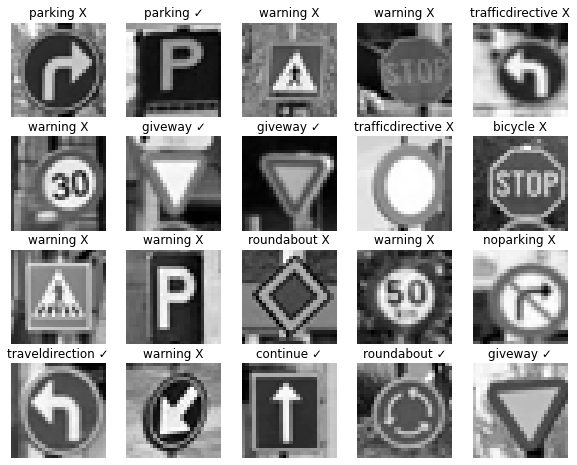

In [5]:
NUM_TO_VISUALIZE = 20
IMAGES_FILE = "test-images.csv"

from models.test import create_test_generator
from models.test import show_visual_results

mlp_test_images = create_test_generator(IMAGES_FILE, CLASS_COLUMN, IMAGE_SIZE, 1)
show_visual_results(mlp_model, mlp_test_images, NUM_TO_VISUALIZE)
score_f1(mlp_model, mlp_test_images)